In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import sys
sys.path.insert(1, './utils')

import torch
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print('CUDA Version ' + torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

NVIDIA GeForce RTX 2080 Ti
CUDA Version 11.3


## Load data from file

In [2]:
import dataparamsml
reload(dataparamsml)

dataDirectoryHome = '../gnnmodel'
scalingList = np.arange(10,21)/10
ieeecase = 'IEEE89'

dataParamsML = dataparamsml.dataParamsML(ieeecase, dataDirectoryHome, scalingList)

In [3]:
import mlmodelwrapper
reload(mlmodelwrapper)
import testmlmodels
reload(testmlmodels)
import plotterresults
reload(plotterresults)

<module 'testmlmodels' from 'C:\\Users\\Windows\\Desktop\\Chadaga\\Failure Cascade\\mlmodels\\./utils\\testmlmodels.py'>

## Function definitions

In [4]:
def trainAndSaveModels(modelType):
    print(modelType + ', ' + ieeecase + ': Training model with the hyperparameters given in the mlmodel.py file...')
    allMlModels = mlmodelwrapper.mlmodelWrapper(dataParamsML, modelType, ieeecase)
    modelFileName = './models/' + modelType.lower() + '_' + ieeecase.lower() + '.pkl'
    allMlModels.learnAndSaveAllMlModels(modelFileName)

In [5]:
def loadModels(modelType):
    allMlModels = mlmodelwrapper.mlmodelWrapper(dataParamsML, modelType, ieeecase)
    modelFileName = './models/' + modelType.lower() + '_' + ieeecase.lower() + '.pkl'
    allMlModels.loadAllModels(modelFileName)
    return allMlModels

In [6]:
def plotBranchLevelMetrics(allMlModels, dataParamsML, customScalingList = None):
    print(modelType + ', ' + ieeecase + ': Testing the model saved on file.')
    testMlModels = testmlmodels.testMlModels(allMlModels, dataParamsML)
    allBranchFailFreqs, allTrueFinalStates, allPredFinalStates = testMlModels.getAllFinalStates(customScalingList)
    allErrors = (allTrueFinalStates != allPredFinalStates)
    errorVectorList = np.mean(allErrors, axis=1)
    plotterresults.plotFinalStateError(errorVectorList, 3, 4, modelType, allBranchFailFreqs, scalingList)
    plt.show()

## Train or load modles, and test models

SVM, IEEE89: Testing the model saved on file.


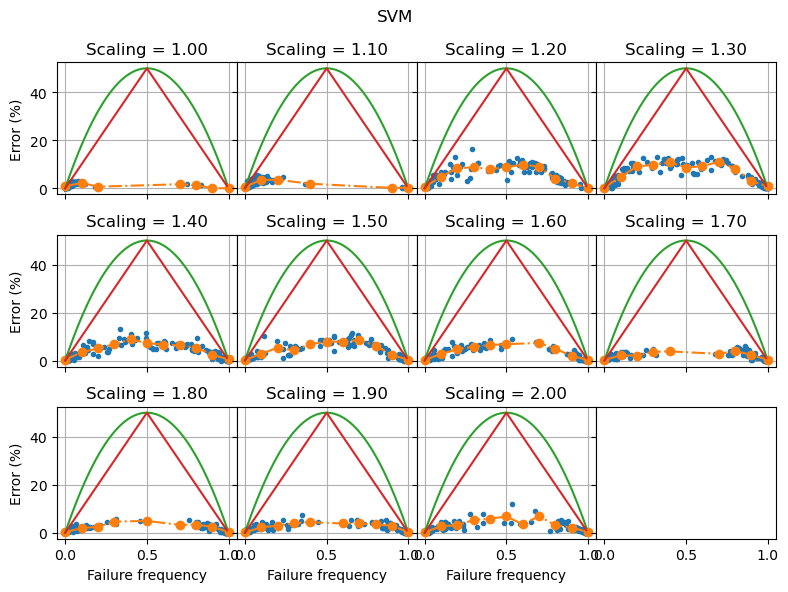

MNB, IEEE89: Testing the model saved on file.


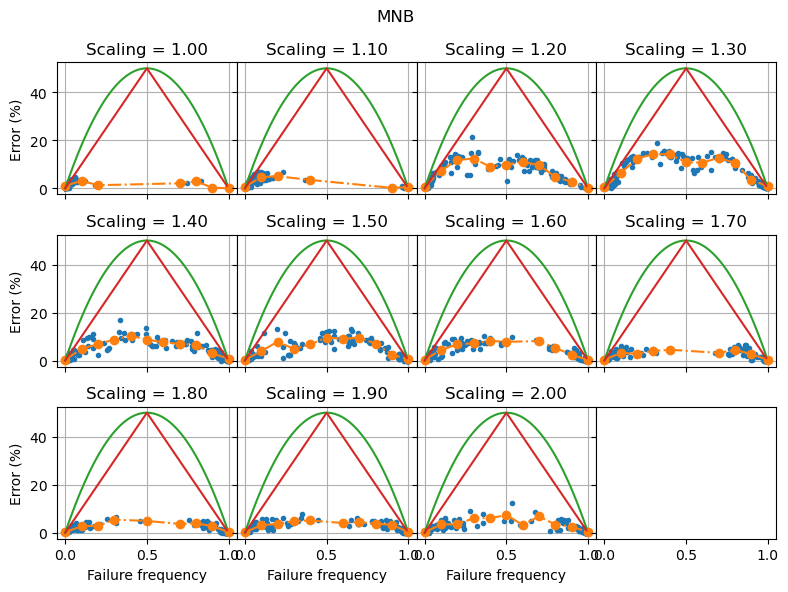

CatNB, IEEE89: Testing the model saved on file.


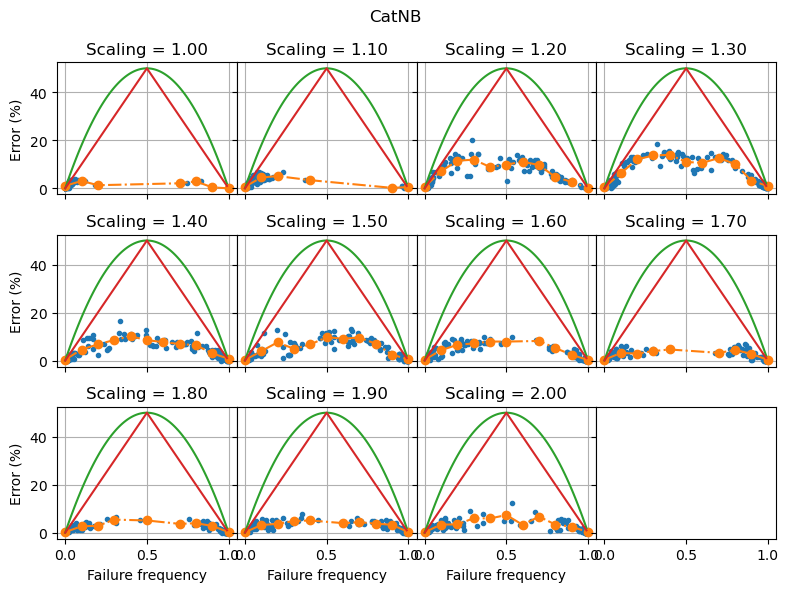

ComNB, IEEE89: Testing the model saved on file.


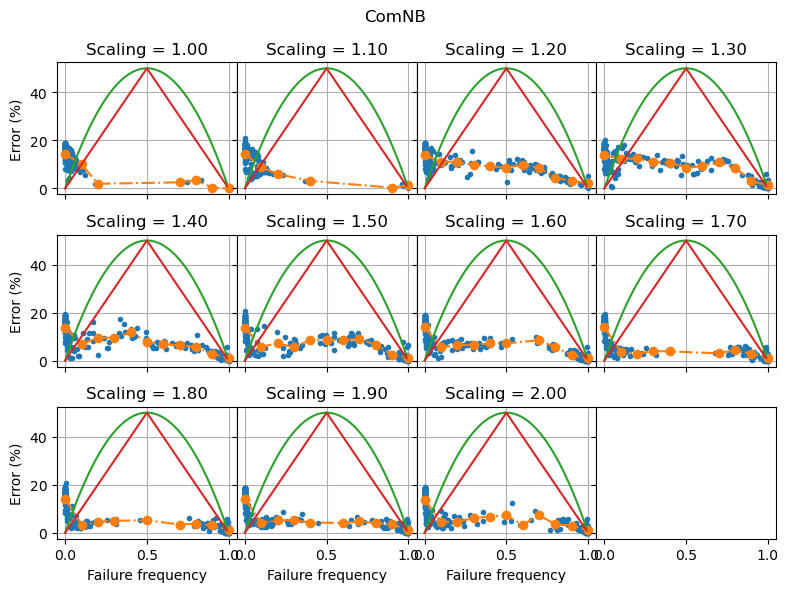

GNB, IEEE89: Testing the model saved on file.


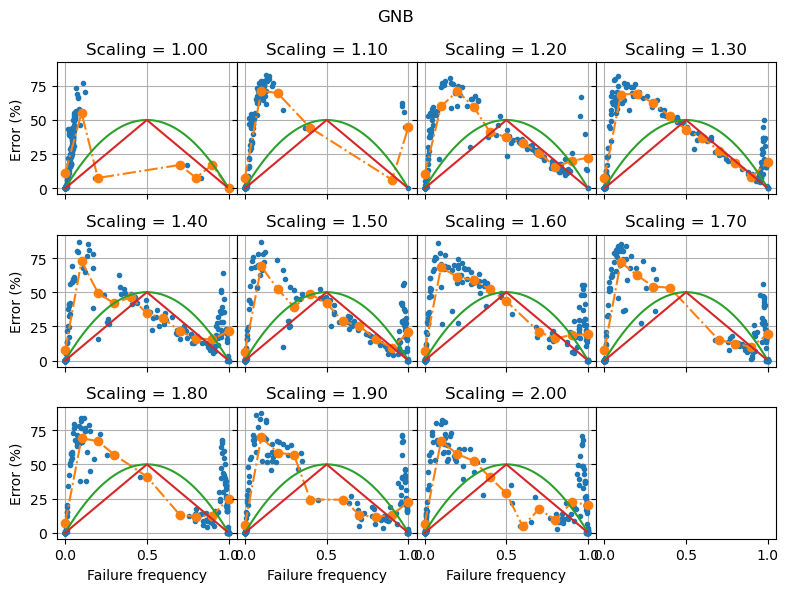

BNB, IEEE89: Testing the model saved on file.


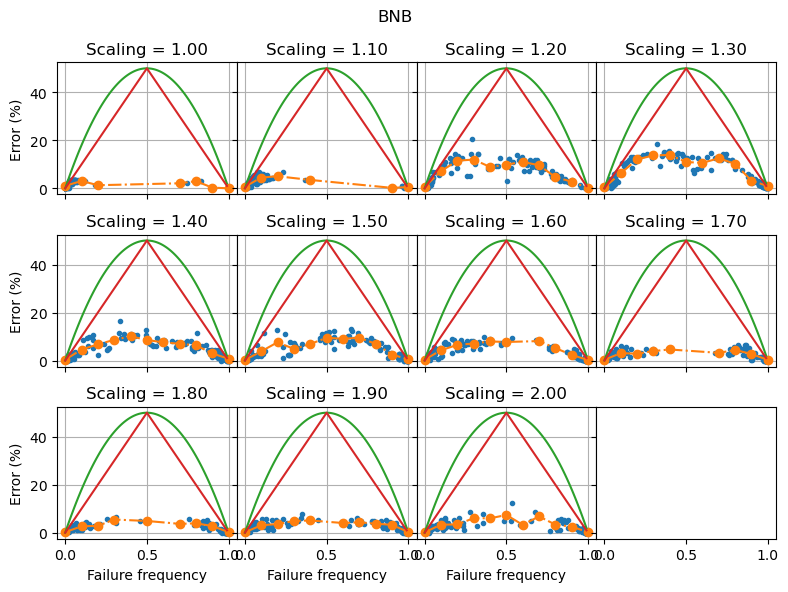

LogR, IEEE89: Testing the model saved on file.


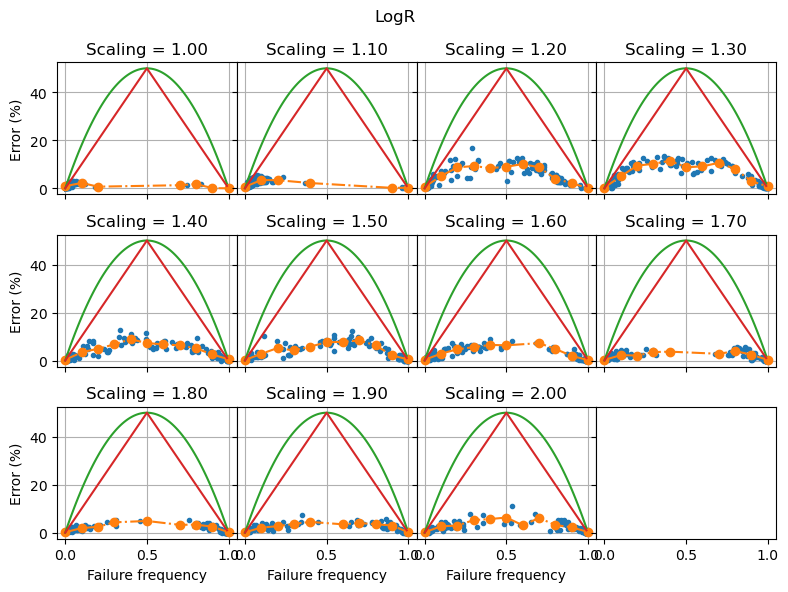

DT, IEEE89: Testing the model saved on file.


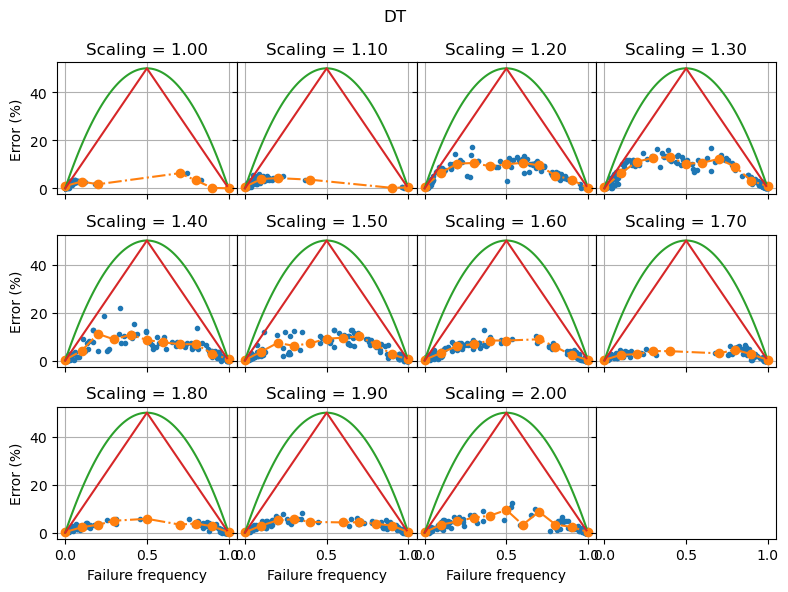

kNN, IEEE89: Testing the model saved on file.


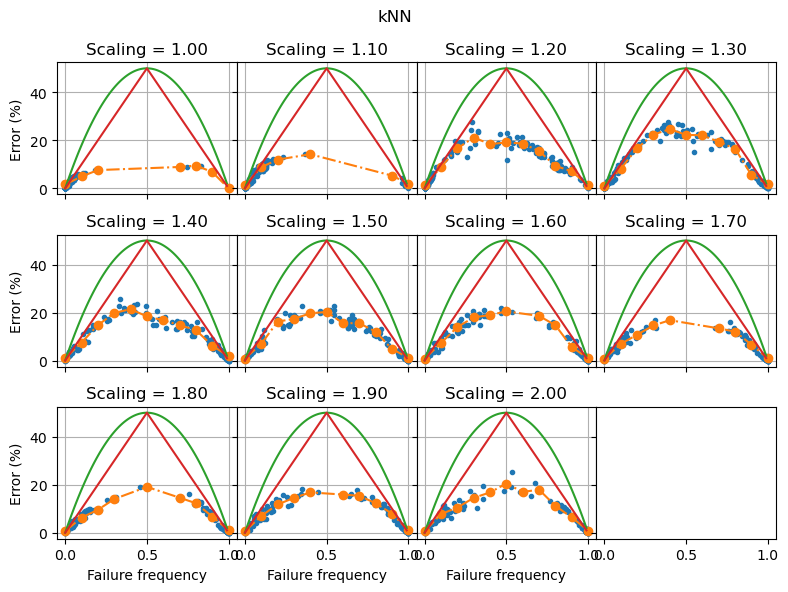

In [8]:
modelTypeList = ['SVM', 'MNB', 'CatNB', 'ComNB', 'GNB', 'BNB', 'LogR', 'DT', 'kNN' ]
for modelType in modelTypeList:
    # trainAndSaveModels(modelType) 
    allMlModels = loadModels(modelType) 
    plotBranchLevelMetrics(allMlModels, dataParamsML)